<a href="https://colab.research.google.com/github/Zombermanic/colab_machine/blob/main/Informe_respaldo_funcionando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

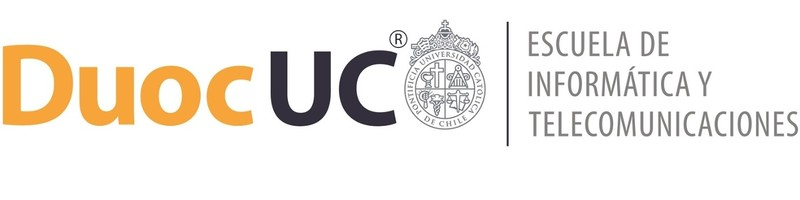

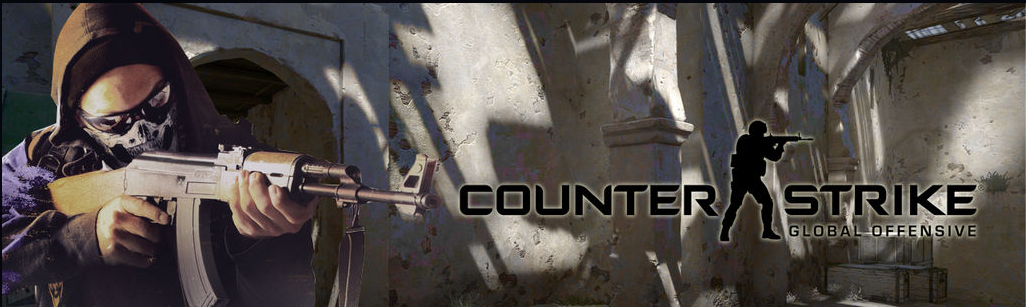

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
Leonardo Carrillo

Valentin Rodriguez

Eduardo Pozo.

Docente: ITALO ANDRES BONET GARRIDO     

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces (1).csv to Anexo ET_demo_round_traces (1) (2).csv


<ipython-input-82-f0e2594db642>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


In [ ]:
df

Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId RoundWinner MatchWinner  Survived  AbnormalMatch  ...  \
0            1       False        True     False          False  ...   
1            1       False        True     False          False  ...   
2            1       False        True     False          False  ...   
3            1       False        True     False          False  ...   
4            1       False        True      True          False  ...   
...        ...         ...         ...       ...            ...  ...   
79152        5       False       False     False          False  ...   
79153        5       False       False     False          False  ...   
79154        5       False       False     False          False  ...   
79155        5       False       False     False          False  ...   
79156        5       False       False      True          False  ...   

      RoundKills RoundAssists  RoundHeadshots  RoundFlankKills  \
0              0            0               0                0   
1              0            0               0                0   
2              0            0               0                0   
3              0            0               0                0   
4              0            0               0                0   
...          ...          ...             ...              ...   
79152          0            0               0                0   
79153          1            0               1                0   
79154          0            0               0                0   
79155          0            0               0                0   
79156          4            0               2                0   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                              750                        4400           0   
1                              800                        4400           0   
2                             1000                        4400           0   
3                              850                        4400           0   
4                             1000                        4400           0   
...                            ...                         ...         ...   
79152                         5600                       27100           4   
79153                         5500                       27100           8   
79154                         4950                       27100           5   
79155                         4950                       27100           1   
79156                         6100                       27100           5   

       MatchFlankKills  MatchAssists MatchHeadshots  
0                    0             0              0  
1                    0             0              0  
2                    0             0              0  
3                    0             0              0  
4                    0             0              0  
...                ...           ...            ...  
79152                0             2              2  
79153                5             1              3  
79154        

## Fase 2: Data Understanding

In [ ]:
#devuelve una tupla con el número de filas y columnas del DataFram
df.shape

(79157, 30)

In [ ]:
#Muestra lazs primeras 5 filas de los datos
df.head()

Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0         600  de_inferno  Terrorist               1        4        1   
1         601  de_inferno  Terrorist               1        4        1   
2         602  de_inferno  Terrorist               1        4        1   
3         603  de_inferno  Terrorist               1        4        1   
4         604  de_inferno  Terrorist               1        4        1   

  RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
0       False        True     False          False  ...          0   
1       False        True     False          False  ...          0   
2       False        True     False          False  ...          0   
3       False        True     False          False  ...          0   
4       False        True      True          False  ...          0   

  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0            0               0                0                          750   
1            0               0                0                          800   
2            0               0                0                         1000   
3            0               0                0                          850   
4            0               0                0                         1000   

   TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                        4400           0                0             0   
1                        4400           0                0             0   
2                        4400           0                0             0   
3                        4400           0                0             0   
4                        4400           0                0             0   

  MatchHeadshots  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 30 columns]

In [ ]:
#descripción concisa de un DataFrame, incluyendo el tipo de datos de cada columna, la cantidad de valores no nulos y la memoria utilizada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
# cuenta la cantidad de valores nulos (NaN) en cada columna
df.isna().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

In [ ]:
#genera un resumen estadístico
df.describe().T

count          mean           std    min  \
Unnamed: 0                   79157.0  60570.193640  36436.598386  600.0   
InternalTeamId               79157.0      1.500006      0.500003    1.0   
MatchId                      79157.0    250.525033    149.557804    4.0   
RoundId                      79157.0     12.765517      7.432837    1.0   
RLethalGrenadesThrown        79157.0      0.498667      0.597985    0.0   
RNonLethalGrenadesThrown     79157.0      1.258057      1.184909    0.0   
PrimaryAssaultRifle          79157.0      0.675363      0.464125    0.0   
PrimarySniperRifle           79157.0      0.089840      0.279797    0.0   
PrimaryHeavy                 79157.0      0.005964      0.075497    0.0   
PrimarySMG                   79157.0      0.007046      0.082453    0.0   
PrimaryPistol                79157.0      0.221787      0.415451    0.0   
RoundKills                   79157.0      0.671349      0.881798    0.0   
RoundAssists                 79157.0      0.146178      0.385601    0.0   
RoundHeadshots               79157.0      0.301553      0.578843    0.0   
RoundFlankKills              79157.0      0.095633      0.320641    0.0   
RoundStartingEquipmentValue  79157.0   3778.108695   2111.285406    0.0   
TeamStartingEquipmentValue   79157.0  18890.133532   9743.203024    0.0   
MatchKills                   79157.0      8.511578      6.195079    0.0   
MatchFlankKills              79157.0      1.209912      1.435150    0.0   
MatchAssists                 79157.0      1.874831      1.824027    0.0   
MatchHeadshots               79157.0      3.858484      3.246752    0.0   

                                 25%      50%      75%       max  
Unnamed: 0                   30830.0  56720.0  90639.0  123779.0  
InternalTeamId                   1.0      2.0      2.0       2.0  
MatchId                        128.0    236.0    373.0     511.0  
RoundId                          6.0     12.0     19.0      36.0  
RLethalGrenadesThrown            0.0      0.0      1.0       4.0  
RNonLethalGrenadesThrown         0.0      1.0      2.0       6.0  
PrimaryAssaultRifle              0.0      1.0      1.0       1.0  
PrimarySniperRifle               0.0      0.0      0.0       1.0  
PrimaryHeavy                     0.0      0.0      0.0       1.0  
PrimarySMG                       0.0      0.0      0.0       1.0  
PrimaryPistol                    0.0      0.0      0.0       1.0  
RoundKills                       0.0      0.0      1.0       5.0  
RoundAssists                     0.0      0.0      0.0       4.0  
RoundHeadshots                   0.0      0.0      0.0       5.0  
RoundFlankKills                  0.0      0.0      0.0       5.0  
RoundStartingEquipmentValue   1600.0   4700.0   5200.0    8850.0  
TeamStartingEquipmentValue   10900.0  22550.0  26050.0   36150.0  
MatchKills                       3.0      8.0     13.0      41.0  
MatchFlankKills                  0.0      1.0      2.0      11.0  
MatchAssists                     0.0      1.0      3.0      14.0  
MatchHeadshots                   1.0      3.0      6.0      22.0

In [ ]:
df.columns

df2=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
#devuelve una lista de las etiquetas de las columnas
df2.columns

Index(['Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner',
       'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
#calcula la matriz de correlación entre las variables numéricas
corr_matrix = df2.corr(numeric_only="TRUE")
corr_matrix["RoundKills"].sort_values(ascending=False)

RoundKills                     1.000000
RoundHeadshots                 0.679179
RoundFlankKills                0.391406
Survived                       0.331619
MatchKills                     0.183402
RoundStartingEquipmentValue    0.172141
TeamStartingEquipmentValue     0.168600
RLethalGrenadesThrown          0.162721
MatchHeadshots                 0.152600
RNonLethalGrenadesThrown       0.148663
PrimaryAssaultRifle            0.127903
MatchFlankKills                0.115988
PrimarySniperRifle             0.072187
InternalTeamId                 0.033085
MatchAssists                   0.019540
PrimarySMG                     0.018592
RoundId                        0.009134
MatchId                        0.003271
PrimaryHeavy                   0.001692
RoundAssists                  -0.021482
PrimaryPistol                 -0.195501
AbnormalMatch                       NaN
Name: RoundKills, dtype: float64

In [ ]:
#se selecciona filas especificas
df2.query('RoundKills==5 or RoundHeadshots==5 or RoundFlankKills==5')

Map              Team  InternalTeamId  MatchId  RoundId  \
5515    de_mirage  CounterTerrorist               2       33       11   
5548    de_mirage  CounterTerrorist               2       33       14   
12200    de_dust2         Terrorist               1       80        8   
12351    de_dust2  CounterTerrorist               1       80       23   
12679  de_inferno         Terrorist               1       82        7   
...           ...               ...             ...      ...      ...   
76332  de_inferno         Terrorist               2      498       15   
78024   de_mirage  CounterTerrorist               2      505       14   
78347  de_inferno  CounterTerrorist               1      506       25   
78862  de_inferno  CounterTerrorist               2      510        6   
78962  de_inferno         Terrorist               2      510       16   

      RoundWinner MatchWinner  Survived  AbnormalMatch  \
5515        False       False      True          False   
5548        False       False      True          False   
12200       False       False      True          False   
12351       False       False      True          False   
12679       False       False      True          False   
...           ...         ...       ...            ...   
76332        True       False      True          False   
78024       False       False      True          False   
78347       False        True      True          False   
78862       False       False      True          False   
78962        True       False      True          False   

                    TimeAlive  ... RoundKills  RoundAssists  RoundHeadshots  \
5515    3.416.168.206.730.180  ...          5             0               1   
5548    6.338.055.665.600.140  ...          5             0               4   
12200  10.786.023.433.012.600  ...          5             0               3   
12351  10.704.737.459.314.500  ...          5             0               3   
12679  12.377.944.640.246.000  ...          5             0               2   
...                       ...  ...        ...           ...             ...   
76332  14.109.291.733.311.800  ...          5             0               3   
78024   5.913.520.315.625.610  ...          5             0               1   
78347   6.350.930.964.734.410  ...          5             0               0   
78862   8.400.925.648.255.770  ...          5             0               2   
78962   8.169.477.957.276.270  ...          5             0               5   

       RoundFlankKills  RoundStartingEquipmentValue  \
5515                 0                         5500   
5548                 1                         5500   
12200                0                         4700   
12351                0                         5500   
12679                0                         4700   
...                ...                          ...   
76332                0                          900   
78024                3                         6200   
78347                0                         7850   
78862                0                          300   
78962                0                          950   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills MatchAssists  \
5515                        21700          18                1            2   
5548                        29100          13                3            2   
12200                       14100           9                1            3   
12351                       24750          27                3            2   
12679                       23600           8                0            0   
...                           ...         ...              ...          ...   
76332                        4200          23                2            2   
78024                       26900          16                4            5   
78347                       31350          13                1            7   
78862                        1600       

In [ ]:
Col_Rel=[
          "Team",
          "MatchId",
          "RoundId",
          "RoundWinner",
          "MatchWinner",
          "PrimaryAssaultRifle",
          "PrimarySniperRifle",
          "PrimaryHeavy",
          "PrimarySMG",
          "PrimaryPistol"	,
          "RoundKills",
          "RoundAssists",
          "RoundHeadshots",
          "RoundFlankKills",
          "RoundStartingEquipmentValue",
          "TeamStartingEquipmentValue",
          "MatchKills",
          "MatchFlankKills",
          "MatchAssists",
          "MatchHeadshots"]
cs_Data = df2[Col_Rel]
cs_Data

Team  MatchId  RoundId RoundWinner MatchWinner  \
0             Terrorist        4        1       False        True   
1             Terrorist        4        1       False        True   
2             Terrorist        4        1       False        True   
3             Terrorist        4        1       False        True   
4             Terrorist        4        1       False        True   
...                 ...      ...      ...         ...         ...   
79152  CounterTerrorist      511        5       False       False   
79153  CounterTerrorist      511        5       False       False   
79154  CounterTerrorist      511        5       False       False   
79155  CounterTerrorist      511        5       False       False   
79156  CounterTerrorist      511        5       False       False   

       PrimaryAssaultRifle  PrimarySniperRifle  PrimaryHeavy  PrimarySMG  \
0                      0.0                 0.0           0.0         0.0   
1                      0.0                 0.0           0.0         0.0   
2                      0.0                 0.0           0.0         0.0   
3                      0.0                 0.0           0.0         0.0   
4                      0.0                 0.0           0.0         0.0   
...                    ...                 ...           ...         ...   
79152                  1.0                 0.0           0.0         0.0   
79153                  1.0                 0.0           0.0         0.0   
79154                  1.0                 0.0           0.0         0.0   
79155                  0.0                 1.0           0.0         0.0   
79156                  1.0                 0.0           0.0         0.0   

       PrimaryPistol  RoundKills  RoundAssists  RoundHeadshots  \
0                  1           0             0               0   
1                  1           0             0               0   
2                  1           0             0               0   
3                  1           0             0               0   
4                  1           0             0               0   
...              ...         ...           ...             ...   
79152              0           0             0               0   
79153              0           1             0               1   
79154              0           0             0               0   
79155              0           0             0               0   
79156              0           4             0               2   

       RoundFlankKills  RoundStartingEquipmentValue  \
0                    0                          750   
1                    0                          800   
2                    0                         1000   
3                    0                          850   
4                    0                         1000   
...                ...                          ...   
79152                0                         5600   
79153                0                         5500   
79154                0                         4950   
79155                0                         4950   
79156                0                         6100   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                            4400           0                0             0   
1                            4400           0                0             0   
2                            4400           0                0             0   
3                            4400           0                0             0   
4                            4400           0                0             0   
...                           ...         ...              ...           ...   
79152                       27100           4                0             2   
79153                       27100           8                5             1   
79154                       27100           5                0             2   
79155                  

<ipython-input-68-87a2469e0cd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_Data[col] = pd.to_numeric(cs_Data[col], errors='coerce')  # Convertir a numérico, reemplazar no convertibles con NaN


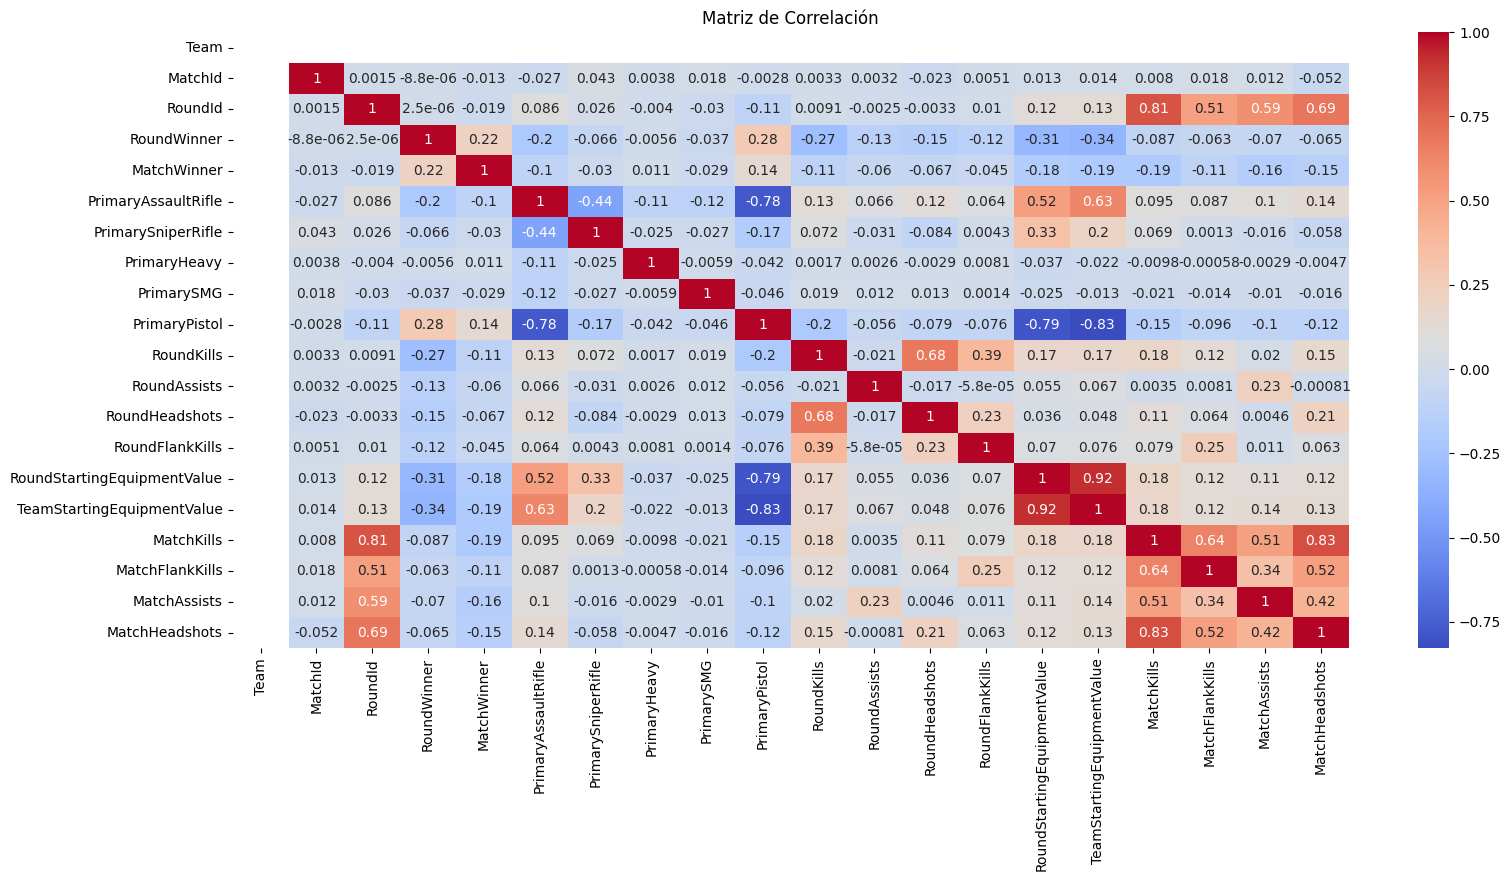

In [ ]:
# Convertir columnas relevantes a tipo numérico, manejando valores no numéricos
for col in cs_Data.columns:
    if cs_Data[col].dtype == 'object':
        try:
            cs_Data[col] = pd.to_numeric(cs_Data[col], errors='coerce')  # Convertir a numérico, reemplazar no convertibles con NaN
        except:
            print(f"No se pudo convertir la columna {col} a numérico")  # Identificar columnas que causan problemas

# Ahora calcula la matriz de correlación
plt.figure(figsize=(18, 8))
New_correlation = cs_Data.corr()
sb.heatmap(New_correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

<Axes: xlabel='MatchKills_rangos', ylabel='MatchHeadshots'>

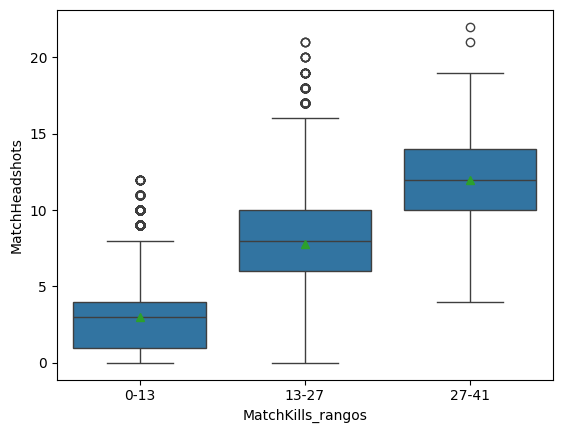

In [ ]:
max_matchkills = df['MatchKills'].max()

bins = [0, max_matchkills/3, max_matchkills*2/3, max_matchkills]
labels = ['0-'+str(int(max_matchkills/3)), str(int(max_matchkills/3))+'-'+str(int(max_matchkills*2/3)), str(int(max_matchkills*2/3))+'-'+str(max_matchkills)]
df['MatchKills_rangos'] = pd.cut(df['MatchKills'], bins=bins, labels=labels)

# Crear boxplot utilizando las categorías de rangos
sb.boxplot(
    x='MatchKills_rangos',
    y='MatchHeadshots',
    showmeans=True,
    data=df
)

<Axes: xlabel='MatchHeadshots', ylabel='MatchKills'>

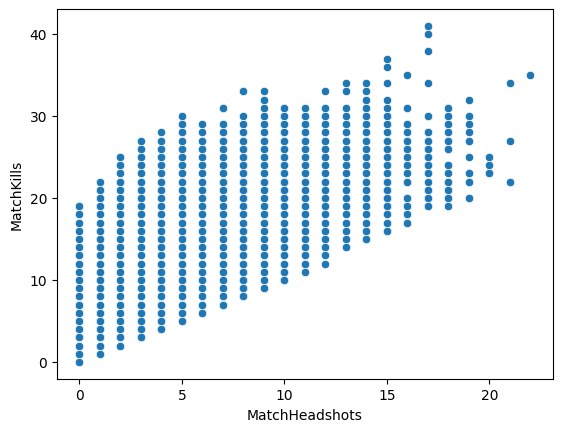

In [ ]:
sb.scatterplot(x=df2.MatchHeadshots ,y=df2.MatchKills)

<Axes: xlabel='PrimaryAssaultRifle', ylabel='MatchKills'>

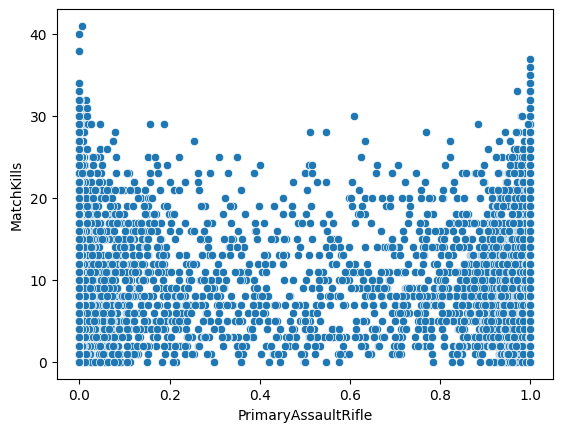

In [ ]:
sb.scatterplot(x=df2.PrimaryAssaultRifle ,y=df2.MatchKills)

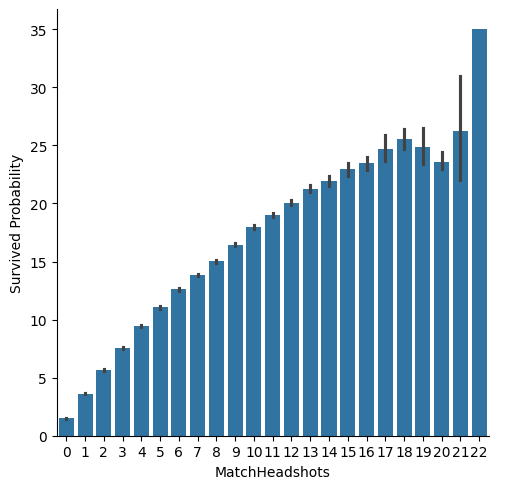

In [ ]:
g = sb.catplot(x = "MatchHeadshots", y = "MatchKills", data = df, kind = "bar")
g.set_ylabels("Survived Probability")
plt.show()

Se puede observar como a mayor numero de kills la probabilidad de tener mayor numero de headshoots aumenta tambien. Pero aun asi esxisten casos aislados. Pero la concentracion de datos se puede observar entre las 20 y 30 MatchKills

In [ ]:
#Calcular la cantidad de filas donde las RoundKills sean mayor a 4
len(df2.query('RoundKills>4'))

67

In [ ]:
len(df2.query('MatchKills>15'))

11830

<ipython-input-75-ea06095b1212>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df2.MatchKills)


<Axes: xlabel='MatchKills', ylabel='Density'>

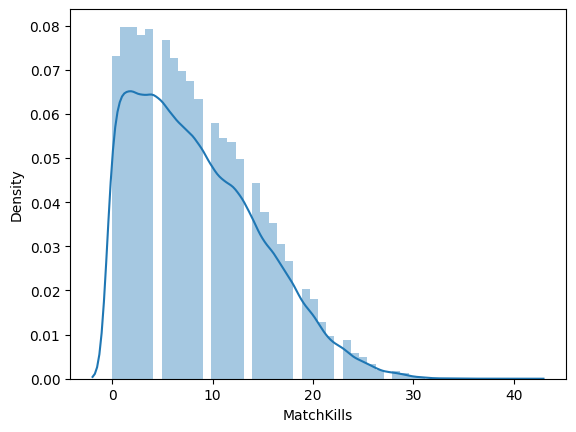

In [ ]:
sb.distplot(df2.MatchKills)

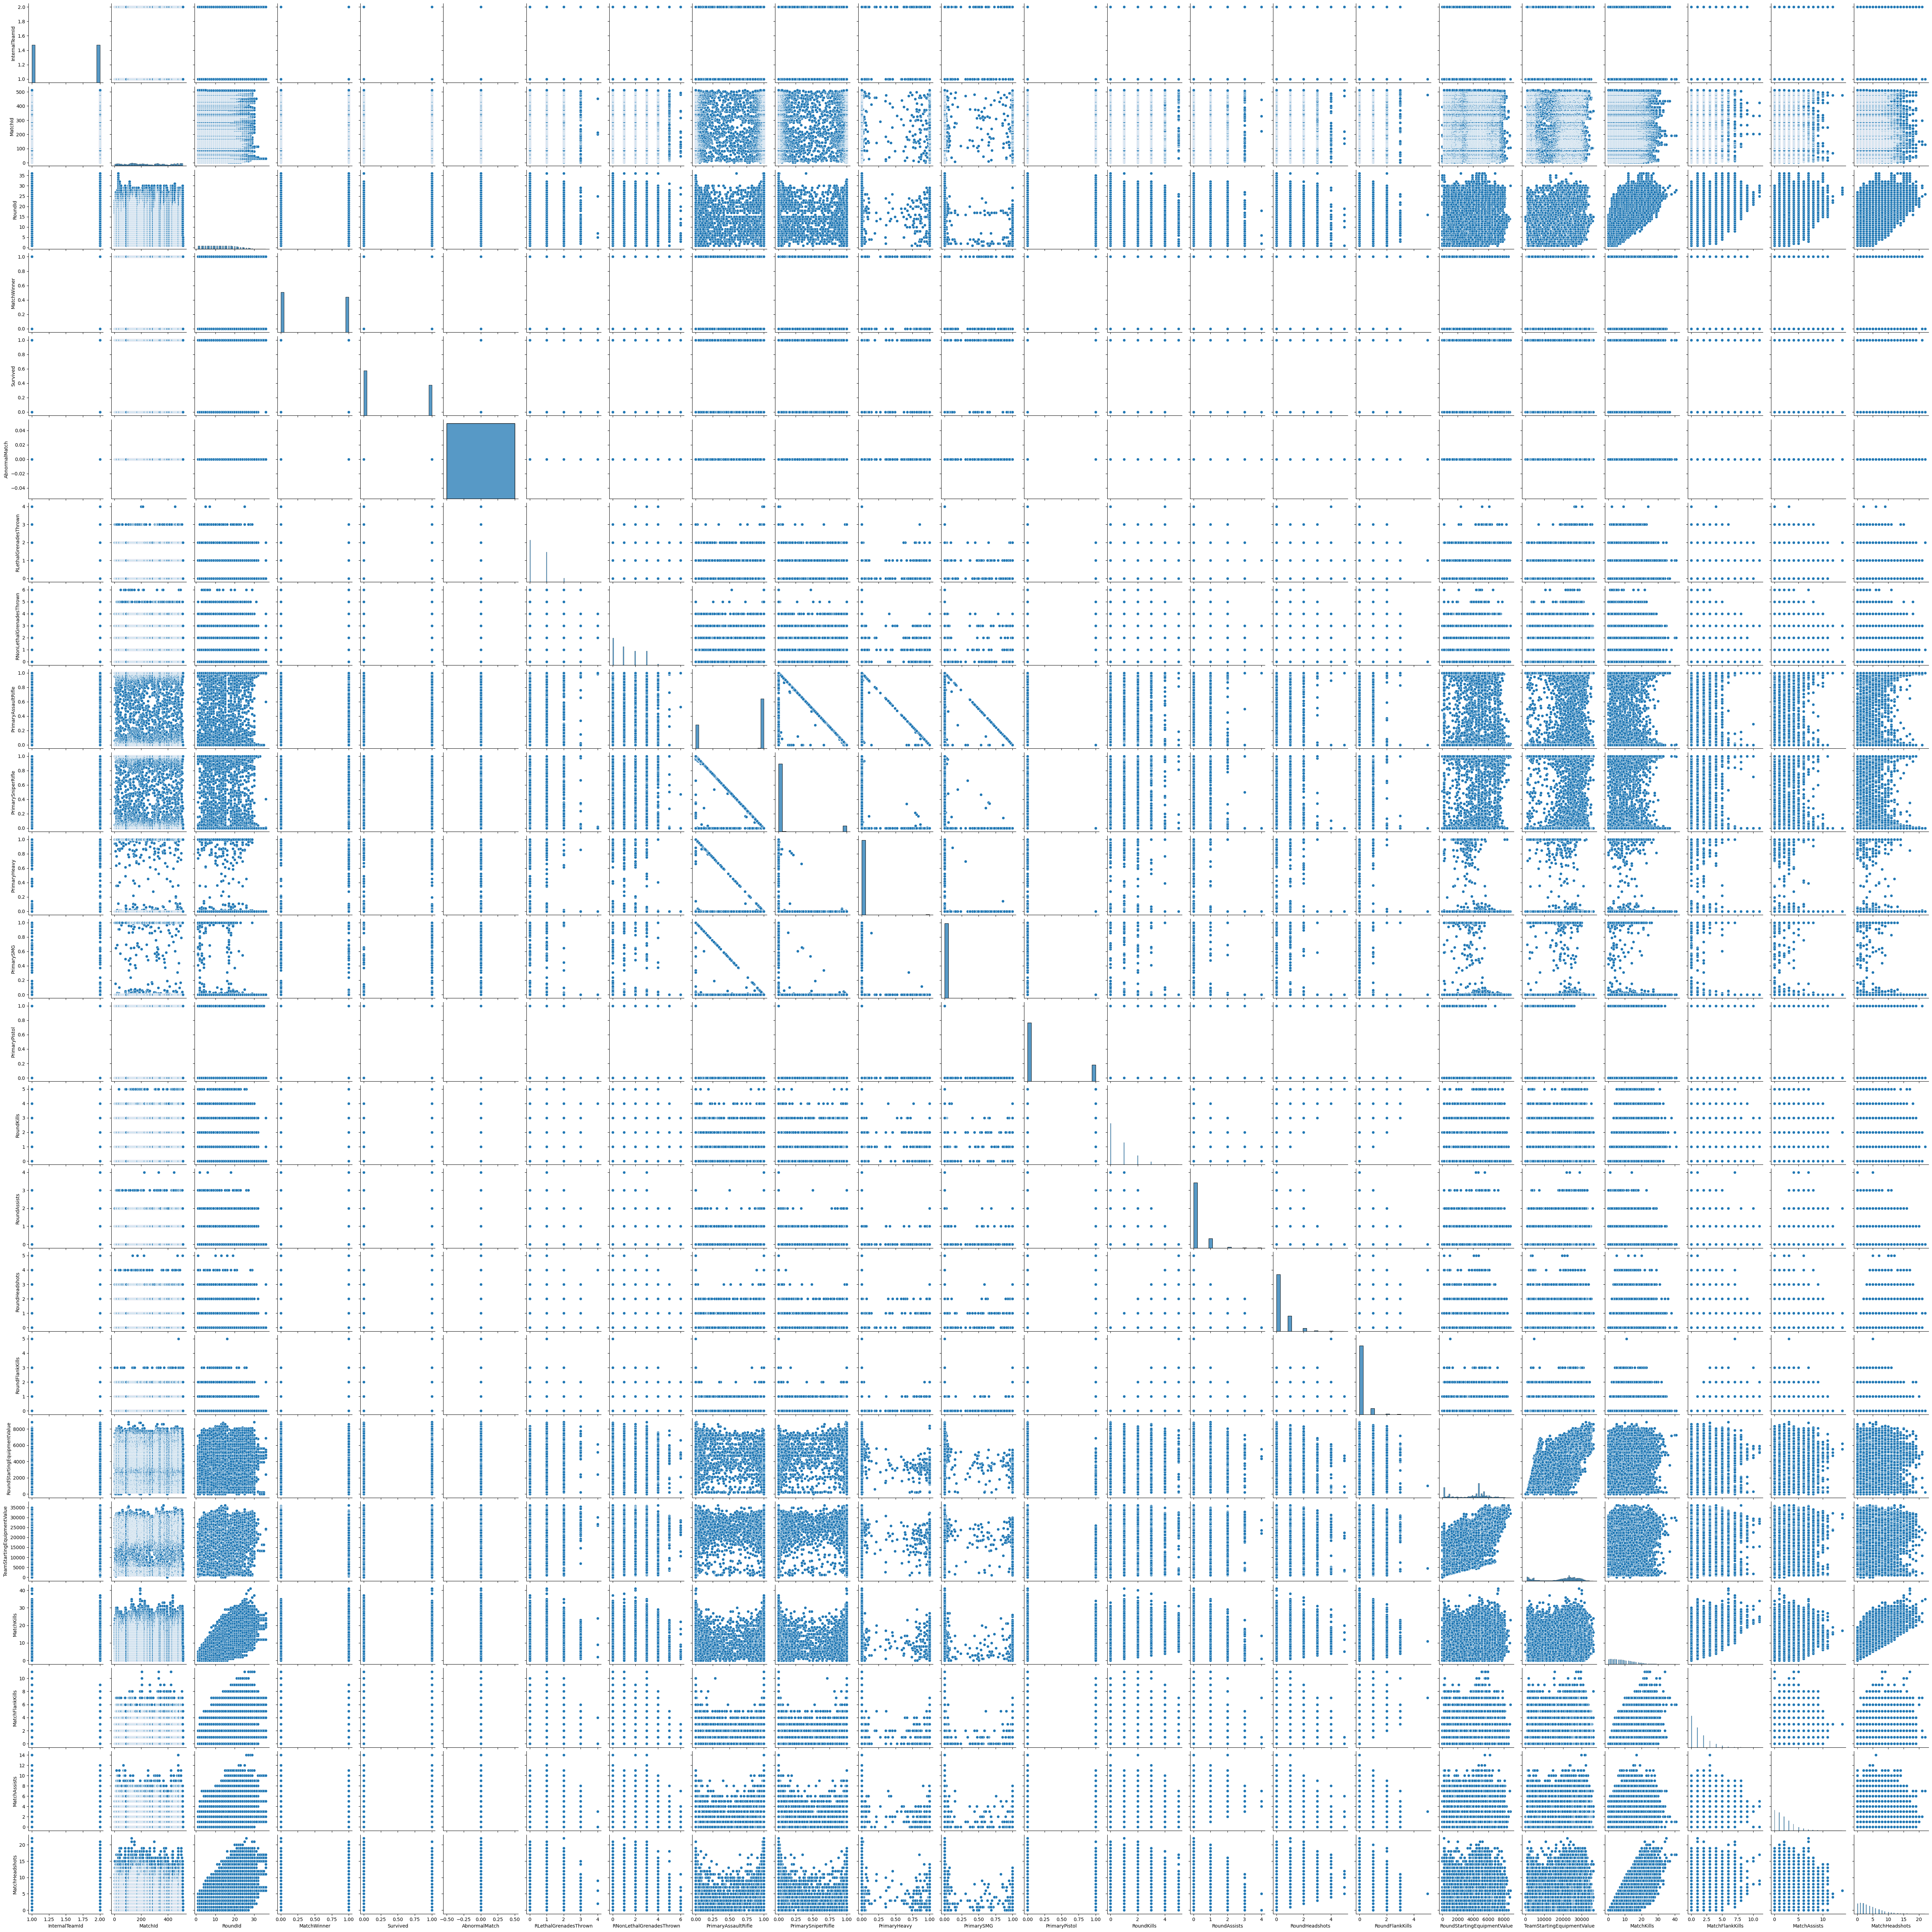

In [ ]:
sb.pairplot(df2)

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

In [ ]:
#Se selecciona filas donde se cumpla al menos 1 condicion
df2.query('MatchKills>10 or MatchAssists>10')



Map              Team  InternalTeamId  MatchId  RoundId  \
68     de_inferno  CounterTerrorist               2        4        7   
78     de_inferno  CounterTerrorist               2        4        8   
85     de_inferno  CounterTerrorist               2        4        9   
88     de_inferno  CounterTerrorist               2        4        9   
95     de_inferno  CounterTerrorist               2        4       10   
...           ...               ...             ...      ...      ...   
79102  de_inferno         Terrorist               2      510       30   
79103  de_inferno         Terrorist               2      510       30   
79104  de_inferno         Terrorist               2      510       30   
79105  de_inferno         Terrorist               2      510       30   
79106  de_inferno         Terrorist               2      510       30   

      RoundWinner MatchWinner  Survived  AbnormalMatch  \
68          False       False      True          False   
78          False       False      True          False   
85          False       False      True          False   
88          False       False      True          False   
95          False       False      True          False   
...           ...         ...       ...            ...   
79102        True       False     False          False   
79103        True       False     False          False   
79104        True       False     False          False   
79105        True       False     False          False   
79106        True       False      True          False   

                    TimeAlive  ... RoundKills  RoundAssists  RoundHeadshots  \
68      7.815.078.457.238.060  ...          1             0               1   
78      7.176.857.478.344.320  ...          1             0               0   
85      5.806.559.494.248.930  ...          2             0               1   
88      5.806.559.494.248.930  ...          0             0               0   
95      4.311.120.141.743.010  ...          1             0               1   
...                       ...  ...        ...           ...             ...   
79102  38.157.592.296.619.600  ...          1             0               0   
79103  41.035.050.076.364.700  ...          0             0               0   
79104  39.846.534.906.470.000  ...          0             0               0   
79105  36.531.203.116.763.700  ...          0             1               0   
79106   5.973.852.564.470.780  ...          1             0               0   

       RoundFlankKills  RoundStartingEquipmentValue  \
68                   0                         5500   
78                   0                         5500   
85                   0                         5100   
88                   0                         5600   
95                   0                         5100   
...                ...                          ...   
79102                0                         3050   
79103                0                         3200   
79104                0                         3200   
79105                0                         3200   
79106                0                         3200   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills MatchAssists  \
68                          26700          11                1            0   
78                          29250          12                1            0   
85                          28750          12                2            3   
88                          28750          12                1            0   
95                          28750          13                2            3   
...                           ...         ...              ...          ...   
79102                       15850          27                1            7   
79103                       15850          12                1            8   
79104                       15850          12                1            3   
79105                       15850       

In [ ]:
df2.query('MatchKills>10 or MatchAssists>10').index

Index([   68,    78,    85,    88,    95,    96,    98,   105,   106,   108,
       ...
       79097, 79098, 79099, 79100, 79101, 79102, 79103, 79104, 79105, 79106],
      dtype='int64', length=27413)

In [ ]:
df.columns

df3=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
#Se eliminan las filas donde las Matchkills sean mayor que 4
df3.drop(df3.query('MatchKills>4').index, inplace=True)
df3

Map              Team  InternalTeamId  MatchId  RoundId  \
0      de_inferno         Terrorist               1        4        1   
1      de_inferno         Terrorist               1        4        1   
2      de_inferno         Terrorist               1        4        1   
3      de_inferno         Terrorist               1        4        1   
4      de_inferno         Terrorist               1        4        1   
...           ...               ...             ...      ...      ...   
79148   de_mirage         Terrorist               1      511        5   
79150   de_mirage         Terrorist               1      511        5   
79151   de_mirage         Terrorist               1      511        5   
79152   de_mirage  CounterTerrorist               2      511        5   
79155   de_mirage  CounterTerrorist               2      511        5   

      RoundWinner MatchWinner  Survived  AbnormalMatch  \
0           False        True     False          False   
1           False        True     False          False   
2           False        True     False          False   
3           False        True     False          False   
4           False        True      True          False   
...           ...         ...       ...            ...   
79148        True        True     False          False   
79150        True        True     False          False   
79151        True        True     False          False   
79152       False       False     False          False   
79155       False       False     False          False   

                    TimeAlive  ... RoundAssists  RoundHeadshots  \
0      51.120.248.995.704.500  ...            0               0   
1       4.348.662.552.266.170  ...            0               0   
2       3.735.469.847.054.540  ...            0               0   
3       4.767.886.136.441.470  ...            0               0   
4       5.312.251.089.027.310  ...            0               0   
...                       ...  ...          ...             ...   
79148  28.714.118.767.313.000  ...            0               0   
79150   5.074.780.990.304.700  ...            0               0   
79151   7.063.282.548.476.450  ...            0               0   
79152     340.272.074.099.723  ...            0               0   
79155  42.582.842.797.783.900  ...            0               0   

       RoundFlankKills  RoundStartingEquipmentValue  \
0                    0                          750   
1                    0                          800   
2                    0                         1000   
3                    0                          850   
4                    0                         1000   
...                ...                          ...   
79148                0                         2300   
79150                0                         2750   
79151                0                         2550   
79152                0                         5600   
79155                0                         4950   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                            4400           0                0             0   
1                            4400           0                0             0   
2                            4400           0                0             0   
3                            4400           0                0             0   
4                            4400           0                0             0   
...                           ...         ...              ...           ...   
79148                       14700           0                0             1   
79150                       14700           0                0             0   
79151                       14700           2                0             0   
79152                       27100           4                0             2   
79155                       27100           1                0             1   

      MatchHe

In [ ]:
df2.query('MatchKills>10 or MatchAssists>10').index

Index([   68,    78,    85,    88,    95,    96,    98,   105,   106,   108,
       ...
       79097, 79098, 79099, 79100, 79101, 79102, 79103, 79104, 79105, 79106],
      dtype='int64', length=27413)

In [ ]:
df2

Map              Team  InternalTeamId  MatchId  RoundId  \
0      de_inferno         Terrorist               1        4        1   
1      de_inferno         Terrorist               1        4        1   
2      de_inferno         Terrorist               1        4        1   
3      de_inferno         Terrorist               1        4        1   
4      de_inferno         Terrorist               1        4        1   
...           ...               ...             ...      ...      ...   
79152   de_mirage  CounterTerrorist               2      511        5   
79153   de_mirage  CounterTerrorist               2      511        5   
79154   de_mirage  CounterTerrorist               2      511        5   
79155   de_mirage  CounterTerrorist               2      511        5   
79156   de_mirage  CounterTerrorist               2      511        5   

      RoundWinner MatchWinner  Survived  AbnormalMatch  \
0           False        True     False          False   
1           False        True     False          False   
2           False        True     False          False   
3           False        True     False          False   
4           False        True      True          False   
...           ...         ...       ...            ...   
79152       False       False     False          False   
79153       False       False     False          False   
79154       False       False     False          False   
79155       False       False     False          False   
79156       False       False      True          False   

                    TimeAlive  ... RoundKills  RoundAssists  RoundHeadshots  \
0      51.120.248.995.704.500  ...          0             0               0   
1       4.348.662.552.266.170  ...          0             0               0   
2       3.735.469.847.054.540  ...          0             0               0   
3       4.767.886.136.441.470  ...          0             0               0   
4       5.312.251.089.027.310  ...          0             0               0   
...                       ...  ...        ...           ...             ...   
79152     340.272.074.099.723  ...          0             0               0   
79153   2.926.105.436.288.080  ...          1             0               1   
79154   5.914.717.797.783.930  ...          0             0               0   
79155  42.582.842.797.783.900  ...          0             0               0   
79156   8.004.793.109.418.280  ...          4             0               2   

       RoundFlankKills  RoundStartingEquipmentValue  \
0                    0                          750   
1                    0                          800   
2                    0                         1000   
3                    0                          850   
4                    0                         1000   
...                ...                          ...   
79152                0                         5600   
79153                0                         5500   
79154                0                         4950   
79155                0                         4950   
79156                0                         6100   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills MatchAssists  \
0                            4400           0                0            0   
1                            4400           0                0            0   
2                            4400           0                0            0   
3                            4400           0                0            0   
4                            4400           0                0            0   
...                           ...         ...              ...          ...   
79152                       27100           4                0            2   
79153                       27100           8                5            1   
79154                       27100           5                0            2   
79155                       27100       

In [ ]:
# Creación de variables Dummy

df2.Map.unique()

array(['de_inferno', 'de_nuke', 'de_mirage', 'de_dust2'], dtype=object)

A contunuacion se viene la eliminacion de datos para poder hacer de mejor manera las predicciones

In [ ]:
df2 = df2.drop("Survived", axis=1)
df2

Map              Team  InternalTeamId  MatchId  RoundId  \
0      de_inferno         Terrorist               1        4        1   
1      de_inferno         Terrorist               1        4        1   
2      de_inferno         Terrorist               1        4        1   
3      de_inferno         Terrorist               1        4        1   
4      de_inferno         Terrorist               1        4        1   
...           ...               ...             ...      ...      ...   
79152   de_mirage  CounterTerrorist               2      511        5   
79153   de_mirage  CounterTerrorist               2      511        5   
79154   de_mirage  CounterTerrorist               2      511        5   
79155   de_mirage  CounterTerrorist               2      511        5   
79156   de_mirage  CounterTerrorist               2      511        5   

      RoundWinner MatchWinner  AbnormalMatch               TimeAlive  \
0           False        True          False  51.120.248.995.704.500   
1           False        True          False   4.348.662.552.266.170   
2           False        True          False   3.735.469.847.054.540   
3           False        True          False   4.767.886.136.441.470   
4           False        True          False   5.312.251.089.027.310   
...           ...         ...            ...                     ...   
79152       False       False          False     340.272.074.099.723   
79153       False       False          False   2.926.105.436.288.080   
79154       False       False          False   5.914.717.797.783.930   
79155       False       False          False  42.582.842.797.783.900   
79156       False       False          False   8.004.793.109.418.280   

            TravelledDistance  ...  RoundKills  RoundAssists  RoundHeadshots  \
0      10.083.140.737.457.000  ...           0             0               0   
1      60.960.883.184.688.400  ...           0             0               0   
2       5.642.252.383.582.750  ...           0             0               0   
3       8.963.473.313.229.970  ...           0             0               0   
4      10.865.649.734.393.100  ...           0             0               0   
...                       ...  ...         ...           ...             ...   
79152   4.048.177.852.924.460  ...           0             0               0   
79153   3.213.477.612.567.870  ...           1             0               1   
79154   6.005.168.938.274.500  ...           0             0               0   
79155  27.987.628.542.398.100  ...           0             0               0   
79156   9.867.724.708.696.010  ...           4             0               2   

       RoundFlankKills  RoundStartingEquipmentValue  \
0                    0                          750   
1                    0                          800   
2                    0                         1000   
3                    0                          850   
4                    0                         1000   
...                ...                          ...   
79152                0                         5600   
79153                0                         5500   
79154                0                         4950   
79155                0                         4950   
79156                0                         6100   

       TeamStartingEquipmentValue  MatchKills MatchFlankKills  MatchAssists  \
0                            4400           0               0             0   
1                            4400           0               0             0   
2                            4400           0               0             0   
3                            4400           0               0             0   
4                            4400           0               0             0   
...                           ...         ...             ...           ...   
79152                       27100           4               0             2   
79153             

In [ ]:
df2 = df2.drop("AbnormalMatch", axis=1)
df2

Map              Team  InternalTeamId  MatchId  RoundId  \
0      de_inferno         Terrorist               1        4        1   
1      de_inferno         Terrorist               1        4        1   
2      de_inferno         Terrorist               1        4        1   
3      de_inferno         Terrorist               1        4        1   
4      de_inferno         Terrorist               1        4        1   
...           ...               ...             ...      ...      ...   
79152   de_mirage  CounterTerrorist               2      511        5   
79153   de_mirage  CounterTerrorist               2      511        5   
79154   de_mirage  CounterTerrorist               2      511        5   
79155   de_mirage  CounterTerrorist               2      511        5   
79156   de_mirage  CounterTerrorist               2      511        5   

      RoundWinner MatchWinner               TimeAlive       TravelledDistance  \
0           False        True  51.120.248.995.704.500  10.083.140.737.457.000   
1           False        True   4.348.662.552.266.170  60.960.883.184.688.400   
2           False        True   3.735.469.847.054.540   5.642.252.383.582.750   
3           False        True   4.767.886.136.441.470   8.963.473.313.229.970   
4           False        True   5.312.251.089.027.310  10.865.649.734.393.100   
...           ...         ...                     ...                     ...   
79152       False       False     340.272.074.099.723   4.048.177.852.924.460   
79153       False       False   2.926.105.436.288.080   3.213.477.612.567.870   
79154       False       False   5.914.717.797.783.930   6.005.168.938.274.500   
79155       False       False  42.582.842.797.783.900  27.987.628.542.398.100   
79156       False       False   8.004.793.109.418.280   9.867.724.708.696.010   

       RLethalGrenadesThrown  ...  RoundKills  RoundAssists  RoundHeadshots  \
0                          0  ...           0             0               0   
1                          0  ...           0             0               0   
2                          0  ...           0             0               0   
3                          0  ...           0             0               0   
4                          1  ...           0             0               0   
...                      ...  ...         ...           ...             ...   
79152                      1  ...           0             0               0   
79153                      0  ...           1             0               1   
79154                      1  ...           0             0               0   
79155                      0  ...           0             0               0   
79156                      2  ...           4             0               2   

       RoundFlankKills  RoundStartingEquipmentValue  \
0                    0                          750   
1                    0                          800   
2                    0                         1000   
3                    0                          850   
4                    0                         1000   
...                ...                          ...   
79152                0                         5600   
79153                0                         5500   
79154                0                         4950   
79155                0                         4950   
79156                0                         6100   

       TeamStartingEquipmentValue MatchKills  MatchFlankKills  MatchAssists  \
0                            4400          0                0             0   
1                            4400          0                0             0   
2                            4400          0                0             0   
3                            4400          0                0             0   
4                            4400          0                0             0   
...                           ...        ...              ...           ...   
7

In [ ]:
df2 = df2.drop("Map", axis=1)
df2

Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0             Terrorist               1        4        1       False   
1             Terrorist               1        4        1       False   
2             Terrorist               1        4        1       False   
3             Terrorist               1        4        1       False   
4             Terrorist               1        4        1       False   
...                 ...             ...      ...      ...         ...   
79152  CounterTerrorist               2      511        5       False   
79153  CounterTerrorist               2      511        5       False   
79154  CounterTerrorist               2      511        5       False   
79155  CounterTerrorist               2      511        5       False   
79156  CounterTerrorist               2      511        5       False   

      MatchWinner               TimeAlive       TravelledDistance  \
0            True  51.120.248.995.704.500  10.083.140.737.457.000   
1            True   4.348.662.552.266.170  60.960.883.184.688.400   
2            True   3.735.469.847.054.540   5.642.252.383.582.750   
3            True   4.767.886.136.441.470   8.963.473.313.229.970   
4            True   5.312.251.089.027.310  10.865.649.734.393.100   
...           ...                     ...                     ...   
79152       False     340.272.074.099.723   4.048.177.852.924.460   
79153       False   2.926.105.436.288.080   3.213.477.612.567.870   
79154       False   5.914.717.797.783.930   6.005.168.938.274.500   
79155       False  42.582.842.797.783.900  27.987.628.542.398.100   
79156       False   8.004.793.109.418.280   9.867.724.708.696.010   

       RLethalGrenadesThrown  RNonLethalGrenadesThrown  ...  RoundKills  \
0                          0                         4  ...           0   
1                          0                         0  ...           0   
2                          0                         0  ...           0   
3                          0                         0  ...           0   
4                          1                         1  ...           0   
...                      ...                       ...  ...         ...   
79152                      1                         1  ...           0   
79153                      0                         0  ...           1   
79154                      1                         1  ...           0   
79155                      0                         2  ...           0   
79156                      2                         1  ...           4   

       RoundAssists  RoundHeadshots  RoundFlankKills  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   
...             ...             ...              ...   
79152             0               0                0   
79153             0               1                0   
79154             0               0                0   
79155             0               0                0   
79156             0               2                0   

       RoundStartingEquipmentValue TeamStartingEquipmentValue  MatchKills  \
0                              750                       4400           0   
1                              800                       4400           0   
2                             1000                       4400           0   
3                              850                       4400           0   
4                             1000                       4400           0   
...                            ...                        ...         ...   
79152                         5600                      27100           4   
79153                         5500                      27100           8   
79154                         4950            

In [ ]:
df2 = df2.drop("TravelledDistance", axis=1)
df2

Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0             Terrorist               1        4        1       False   
1             Terrorist               1        4        1       False   
2             Terrorist               1        4        1       False   
3             Terrorist               1        4        1       False   
4             Terrorist               1        4        1       False   
...                 ...             ...      ...      ...         ...   
79152  CounterTerrorist               2      511        5       False   
79153  CounterTerrorist               2      511        5       False   
79154  CounterTerrorist               2      511        5       False   
79155  CounterTerrorist               2      511        5       False   
79156  CounterTerrorist               2      511        5       False   

      MatchWinner               TimeAlive  RLethalGrenadesThrown  \
0            True  51.120.248.995.704.500                      0   
1            True   4.348.662.552.266.170                      0   
2            True   3.735.469.847.054.540                      0   
3            True   4.767.886.136.441.470                      0   
4            True   5.312.251.089.027.310                      1   
...           ...                     ...                    ...   
79152       False     340.272.074.099.723                      1   
79153       False   2.926.105.436.288.080                      0   
79154       False   5.914.717.797.783.930                      1   
79155       False  42.582.842.797.783.900                      0   
79156       False   8.004.793.109.418.280                      2   

       RNonLethalGrenadesThrown  PrimaryAssaultRifle  ...  RoundKills  \
0                             4                  0.0  ...           0   
1                             0                  0.0  ...           0   
2                             0                  0.0  ...           0   
3                             0                  0.0  ...           0   
4                             1                  0.0  ...           0   
...                         ...                  ...  ...         ...   
79152                         1                  1.0  ...           0   
79153                         0                  1.0  ...           1   
79154                         1                  1.0  ...           0   
79155                         2                  0.0  ...           0   
79156                         1                  1.0  ...           4   

       RoundAssists  RoundHeadshots  RoundFlankKills  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   
...             ...             ...              ...   
79152             0               0                0   
79153             0               1                0   
79154             0               0                0   
79155             0               0                0   
79156             0               2                0   

      RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                             750                        4400           0   
1                             800                        4400           0   
2                            1000                        4400           0   
3                             850                        4400           0   
4                            1000                        4400           0   
...                           ...                         ...         ...   
79152                        5600                       27100           4   
79153                        5500                       27100           8   
79154                        4950                       27100           5   
79155

In [ ]:
df2 = df2.drop("TimeAlive", axis=1)
df2

Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0             Terrorist               1        4        1       False   
1             Terrorist               1        4        1       False   
2             Terrorist               1        4        1       False   
3             Terrorist               1        4        1       False   
4             Terrorist               1        4        1       False   
...                 ...             ...      ...      ...         ...   
79152  CounterTerrorist               2      511        5       False   
79153  CounterTerrorist               2      511        5       False   
79154  CounterTerrorist               2      511        5       False   
79155  CounterTerrorist               2      511        5       False   
79156  CounterTerrorist               2      511        5       False   

      MatchWinner  RLethalGrenadesThrown  RNonLethalGrenadesThrown  \
0            True                      0                         4   
1            True                      0                         0   
2            True                      0                         0   
3            True                      0                         0   
4            True                      1                         1   
...           ...                    ...                       ...   
79152       False                      1                         1   
79153       False                      0                         0   
79154       False                      1                         1   
79155       False                      0                         2   
79156       False                      2                         1   

       PrimaryAssaultRifle  PrimarySniperRifle  ...  RoundKills  RoundAssists  \
0                      0.0                 0.0  ...           0             0   
1                      0.0                 0.0  ...           0             0   
2                      0.0                 0.0  ...           0             0   
3                      0.0                 0.0  ...           0             0   
4                      0.0                 0.0  ...           0             0   
...                    ...                 ...  ...         ...           ...   
79152                  1.0                 0.0  ...           0             0   
79153                  1.0                 0.0  ...           1             0   
79154                  1.0                 0.0  ...           0             0   
79155                  0.0                 1.0  ...           0             0   
79156                  1.0                 0.0  ...           4             0   

       RoundHeadshots RoundFlankKills  RoundStartingEquipmentValue  \
0                   0               0                          750   
1                   0               0                          800   
2                   0               0                         1000   
3                   0               0                          850   
4                   0               0                         1000   
...               ...             ...                          ...   
79152               0               0                         5600   
79153               1               0                         5500   
79154               0               0                         4950   
79155               0               0                         4950   
79156               2               0                         6100   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                            4400           0                0             0   
1                            4400           0                0             0   
2                            4400           0                0             0   
3                            4400           0                0             0   
4                            4400           0                0             0   
...    

In [ ]:
df2 = df2.drop("FirstKillTime", axis=1)
df2

Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0             Terrorist               1        4        1       False   
1             Terrorist               1        4        1       False   
2             Terrorist               1        4        1       False   
3             Terrorist               1        4        1       False   
4             Terrorist               1        4        1       False   
...                 ...             ...      ...      ...         ...   
79152  CounterTerrorist               2      511        5       False   
79153  CounterTerrorist               2      511        5       False   
79154  CounterTerrorist               2      511        5       False   
79155  CounterTerrorist               2      511        5       False   
79156  CounterTerrorist               2      511        5       False   

      MatchWinner  RLethalGrenadesThrown  RNonLethalGrenadesThrown  \
0            True                      0                         4   
1            True                      0                         0   
2            True                      0                         0   
3            True                      0                         0   
4            True                      1                         1   
...           ...                    ...                       ...   
79152       False                      1                         1   
79153       False                      0                         0   
79154       False                      1                         1   
79155       False                      0                         2   
79156       False                      2                         1   

       PrimaryAssaultRifle  PrimarySniperRifle  ...  RoundKills  RoundAssists  \
0                      0.0                 0.0  ...           0             0   
1                      0.0                 0.0  ...           0             0   
2                      0.0                 0.0  ...           0             0   
3                      0.0                 0.0  ...           0             0   
4                      0.0                 0.0  ...           0             0   
...                    ...                 ...  ...         ...           ...   
79152                  1.0                 0.0  ...           0             0   
79153                  1.0                 0.0  ...           1             0   
79154                  1.0                 0.0  ...           0             0   
79155                  0.0                 1.0  ...           0             0   
79156                  1.0                 0.0  ...           4             0   

       RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0                   0                0                          750   
1                   0                0                          800   
2                   0                0                         1000   
3                   0                0                          850   
4                   0                0                         1000   
...               ...              ...                          ...   
79152               0                0                         5600   
79153               1                0                         5500   
79154               0                0                         4950   
79155               0                0                         4950   
79156               2                0                         6100   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                            4400           0                0             0   
1                            4400           0                0             0   
2                            4400           0                0             0   
3                            4400           0                0             0   
4                            4400           0                0             

In [ ]:
df2 = df2.drop("InternalTeamId", axis=1)
df2

Team  MatchId  RoundId RoundWinner MatchWinner  \
0             Terrorist        4        1       False        True   
1             Terrorist        4        1       False        True   
2             Terrorist        4        1       False        True   
3             Terrorist        4        1       False        True   
4             Terrorist        4        1       False        True   
...                 ...      ...      ...         ...         ...   
79152  CounterTerrorist      511        5       False       False   
79153  CounterTerrorist      511        5       False       False   
79154  CounterTerrorist      511        5       False       False   
79155  CounterTerrorist      511        5       False       False   
79156  CounterTerrorist      511        5       False       False   

       RLethalGrenadesThrown  RNonLethalGrenadesThrown  PrimaryAssaultRifle  \
0                          0                         4                  0.0   
1                          0                         0                  0.0   
2                          0                         0                  0.0   
3                          0                         0                  0.0   
4                          1                         1                  0.0   
...                      ...                       ...                  ...   
79152                      1                         1                  1.0   
79153                      0                         0                  1.0   
79154                      1                         1                  1.0   
79155                      0                         2                  0.0   
79156                      2                         1                  1.0   

       PrimarySniperRifle  PrimaryHeavy  ...  RoundKills  RoundAssists  \
0                     0.0           0.0  ...           0             0   
1                     0.0           0.0  ...           0             0   
2                     0.0           0.0  ...           0             0   
3                     0.0           0.0  ...           0             0   
4                     0.0           0.0  ...           0             0   
...                   ...           ...  ...         ...           ...   
79152                 0.0           0.0  ...           0             0   
79153                 0.0           0.0  ...           1             0   
79154                 0.0           0.0  ...           0             0   
79155                 1.0           0.0  ...           0             0   
79156                 0.0           0.0  ...           4             0   

       RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0                   0                0                          750   
1                   0                0                          800   
2                   0                0                         1000   
3                   0                0                          850   
4                   0                0                         1000   
...               ...              ...                          ...   
79152               0                0                         5600   
79153               1                0                         5500   
79154               0                0                         4950   
79155               0                0                         4950   
79156               2                0                         6100   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                            4400           0                0             0   
1                            4400           0                0             0   
2                            4400           0                0             0   
3                            4400           0                0             0   
4                            4400           0                0             0   
...                

In [ ]:
df2 = df2.drop("RLethalGrenadesThrown", axis=1)
df2

Team  MatchId  RoundId RoundWinner MatchWinner  \
0             Terrorist        4        1       False        True   
1             Terrorist        4        1       False        True   
2             Terrorist        4        1       False        True   
3             Terrorist        4        1       False        True   
4             Terrorist        4        1       False        True   
...                 ...      ...      ...         ...         ...   
79152  CounterTerrorist      511        5       False       False   
79153  CounterTerrorist      511        5       False       False   
79154  CounterTerrorist      511        5       False       False   
79155  CounterTerrorist      511        5       False       False   
79156  CounterTerrorist      511        5       False       False   

       RNonLethalGrenadesThrown  PrimaryAssaultRifle  PrimarySniperRifle  \
0                             4                  0.0                 0.0   
1                             0                  0.0                 0.0   
2                             0                  0.0                 0.0   
3                             0                  0.0                 0.0   
4                             1                  0.0                 0.0   
...                         ...                  ...                 ...   
79152                         1                  1.0                 0.0   
79153                         0                  1.0                 0.0   
79154                         1                  1.0                 0.0   
79155                         2                  0.0                 1.0   
79156                         1                  1.0                 0.0   

       PrimaryHeavy  PrimarySMG  ...  RoundKills  RoundAssists  \
0               0.0         0.0  ...           0             0   
1               0.0         0.0  ...           0             0   
2               0.0         0.0  ...           0             0   
3               0.0         0.0  ...           0             0   
4               0.0         0.0  ...           0             0   
...             ...         ...  ...         ...           ...   
79152           0.0         0.0  ...           0             0   
79153           0.0         0.0  ...           1             0   
79154           0.0         0.0  ...           0             0   
79155           0.0         0.0  ...           0             0   
79156           0.0         0.0  ...           4             0   

       RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0                   0                0                          750   
1                   0                0                          800   
2                   0                0                         1000   
3                   0                0                          850   
4                   0                0                         1000   
...               ...              ...                          ...   
79152               0                0                         5600   
79153               1                0                         5500   
79154               0                0                         4950   
79155               0                0                         4950   
79156               2                0                         6100   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                            4400           0                0             0   
1                            4400           0                0             0   
2                            4400           0                0             0   
3                            4400           0                0             0   
4                            4400           0                0             0   
...                           ...         ...              ...           ...   
79152                       27100           4                0         

In [ ]:
df2 = df2.drop("RNonLethalGrenadesThrown", axis=1)
df2

Team  MatchId  RoundId RoundWinner MatchWinner  \
0             Terrorist        4        1       False        True   
1             Terrorist        4        1       False        True   
2             Terrorist        4        1       False        True   
3             Terrorist        4        1       False        True   
4             Terrorist        4        1       False        True   
...                 ...      ...      ...         ...         ...   
79152  CounterTerrorist      511        5       False       False   
79153  CounterTerrorist      511        5       False       False   
79154  CounterTerrorist      511        5       False       False   
79155  CounterTerrorist      511        5       False       False   
79156  CounterTerrorist      511        5       False       False   

       PrimaryAssaultRifle  PrimarySniperRifle  PrimaryHeavy  PrimarySMG  \
0                      0.0                 0.0           0.0         0.0   
1                      0.0                 0.0           0.0         0.0   
2                      0.0                 0.0           0.0         0.0   
3                      0.0                 0.0           0.0         0.0   
4                      0.0                 0.0           0.0         0.0   
...                    ...                 ...           ...         ...   
79152                  1.0                 0.0           0.0         0.0   
79153                  1.0                 0.0           0.0         0.0   
79154                  1.0                 0.0           0.0         0.0   
79155                  0.0                 1.0           0.0         0.0   
79156                  1.0                 0.0           0.0         0.0   

       PrimaryPistol  RoundKills  RoundAssists  RoundHeadshots  \
0                  1           0             0               0   
1                  1           0             0               0   
2                  1           0             0               0   
3                  1           0             0               0   
4                  1           0             0               0   
...              ...         ...           ...             ...   
79152              0           0             0               0   
79153              0           1             0               1   
79154              0           0             0               0   
79155              0           0             0               0   
79156              0           4             0               2   

       RoundFlankKills  RoundStartingEquipmentValue  \
0                    0                          750   
1                    0                          800   
2                    0                         1000   
3                    0                          850   
4                    0                         1000   
...                ...                          ...   
79152                0                         5600   
79153                0                         5500   
79154                0                         4950   
79155                0                         4950   
79156                0                         6100   

       TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                            4400           0                0             0   
1                            4400           0                0             0   
2                            4400           0                0             0   
3                            4400           0                0             0   
4                            4400           0                0             0   
...                           ...         ...              ...           ...   
79152                       27100           4                0             2   
79153                       27100           8                5             1   
79154                       27100           5                0             2   
79155                  

In [ ]:
df2.Team.replace({'Terrorist':0 , 'CounterTerrorist':1}, inplace=True) #Se reemplaza las variables a unas numericas
df2

Team  MatchId  RoundId RoundWinner MatchWinner  PrimaryAssaultRifle  \
0       0.0        4        1       False        True                  0.0   
1       0.0        4        1       False        True                  0.0   
2       0.0        4        1       False        True                  0.0   
3       0.0        4        1       False        True                  0.0   
4       0.0        4        1       False        True                  0.0   
...     ...      ...      ...         ...         ...                  ...   
79152   1.0      511        5       False       False                  1.0   
79153   1.0      511        5       False       False                  1.0   
79154   1.0      511        5       False       False                  1.0   
79155   1.0      511        5       False       False                  0.0   
79156   1.0      511        5       False       False                  1.0   

       PrimarySniperRifle  PrimaryHeavy  PrimarySMG  PrimaryPistol  \
0                     0.0           0.0         0.0              1   
1                     0.0           0.0         0.0              1   
2                     0.0           0.0         0.0              1   
3                     0.0           0.0         0.0              1   
4                     0.0           0.0         0.0              1   
...                   ...           ...         ...            ...   
79152                 0.0           0.0         0.0              0   
79153                 0.0           0.0         0.0              0   
79154                 0.0           0.0         0.0              0   
79155                 1.0           0.0         0.0              0   
79156                 0.0           0.0         0.0              0   

       RoundKills  RoundAssists  RoundHeadshots  RoundFlankKills  \
0               0             0               0                0   
1               0             0               0                0   
2               0             0               0                0   
3               0             0               0                0   
4               0             0               0                0   
...           ...           ...             ...              ...   
79152           0             0               0                0   
79153           1             0               1                0   
79154           0             0               0                0   
79155           0             0               0                0   
79156           4             0               2                0   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                              750                        4400           0   
1                              800                        4400           0   
2                             1000                        4400           0   
3                              850                        4400           0   
4                             1000                        4400           0   
...                            ...                         ...         ...   
79152                         5600                       27100           4   
79153                         5500                       27100           8   
79154                         4950                       27100           5   
79155                         4950                       27100           1   
79156                         6100                       27100           5   

       MatchFlankKills  MatchAssists  MatchHeadshots  
0                    0             0               0  
1                    0             0               0  
2                    0             0               0  
3                    0             0               0  
4                    0             0               0  
...                ...           ...             ...  
79152                0             2               2  
79153                5             

In [ ]:
df2.MatchWinner.replace({True:0 , False:1}, inplace=True) #Se reemplaza las variables a unas numericas
df2

Team  MatchId  RoundId RoundWinner  MatchWinner  PrimaryAssaultRifle  \
0       0.0        4        1       False          0.0                  0.0   
1       0.0        4        1       False          0.0                  0.0   
2       0.0        4        1       False          0.0                  0.0   
3       0.0        4        1       False          0.0                  0.0   
4       0.0        4        1       False          0.0                  0.0   
...     ...      ...      ...         ...          ...                  ...   
79152   1.0      511        5       False          1.0                  1.0   
79153   1.0      511        5       False          1.0                  1.0   
79154   1.0      511        5       False          1.0                  1.0   
79155   1.0      511        5       False          1.0                  0.0   
79156   1.0      511        5       False          1.0                  1.0   

       PrimarySniperRifle  PrimaryHeavy  PrimarySMG  PrimaryPistol  \
0                     0.0           0.0         0.0              1   
1                     0.0           0.0         0.0              1   
2                     0.0           0.0         0.0              1   
3                     0.0           0.0         0.0              1   
4                     0.0           0.0         0.0              1   
...                   ...           ...         ...            ...   
79152                 0.0           0.0         0.0              0   
79153                 0.0           0.0         0.0              0   
79154                 0.0           0.0         0.0              0   
79155                 1.0           0.0         0.0              0   
79156                 0.0           0.0         0.0              0   

       RoundKills  RoundAssists  RoundHeadshots  RoundFlankKills  \
0               0             0               0                0   
1               0             0               0                0   
2               0             0               0                0   
3               0             0               0                0   
4               0             0               0                0   
...           ...           ...             ...              ...   
79152           0             0               0                0   
79153           1             0               1                0   
79154           0             0               0                0   
79155           0             0               0                0   
79156           4             0               2                0   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                              750                        4400           0   
1                              800                        4400           0   
2                             1000                        4400           0   
3                              850                        4400           0   
4                             1000                        4400           0   
...                            ...                         ...         ...   
79152                         5600                       27100           4   
79153                         5500                       27100           8   
79154                         4950                       27100           5   
79155                         4950                       27100           1   
79156                         6100                       27100           5   

       MatchFlankKills  MatchAssists  MatchHeadshots  
0                    0             0               0  
1                    0             0               0  
2                    0             0               0  
3                    0             0               0  
4                    0             0               0  
...                ...           ...             ...  
79152                0             2               2  
79153                5 

In [ ]:
df2.RoundWinner.replace({True:0 , False:1, 'False':1, 'True': 0, 'False4':1 }, inplace=True) #Se reemplaza las variables a unas numericas
df2

Team  MatchId  RoundId  RoundWinner  MatchWinner  PrimaryAssaultRifle  \
0       0.0        4        1            1          0.0                  0.0   
1       0.0        4        1            1          0.0                  0.0   
2       0.0        4        1            1          0.0                  0.0   
3       0.0        4        1            1          0.0                  0.0   
4       0.0        4        1            1          0.0                  0.0   
...     ...      ...      ...          ...          ...                  ...   
79152   1.0      511        5            1          1.0                  1.0   
79153   1.0      511        5            1          1.0                  1.0   
79154   1.0      511        5            1          1.0                  1.0   
79155   1.0      511        5            1          1.0                  0.0   
79156   1.0      511        5            1          1.0                  1.0   

       PrimarySniperRifle  PrimaryHeavy  PrimarySMG  PrimaryPistol  \
0                     0.0           0.0         0.0              1   
1                     0.0           0.0         0.0              1   
2                     0.0           0.0         0.0              1   
3                     0.0           0.0         0.0              1   
4                     0.0           0.0         0.0              1   
...                   ...           ...         ...            ...   
79152                 0.0           0.0         0.0              0   
79153                 0.0           0.0         0.0              0   
79154                 0.0           0.0         0.0              0   
79155                 1.0           0.0         0.0              0   
79156                 0.0           0.0         0.0              0   

       RoundKills  RoundAssists  RoundHeadshots  RoundFlankKills  \
0               0             0               0                0   
1               0             0               0                0   
2               0             0               0                0   
3               0             0               0                0   
4               0             0               0                0   
...           ...           ...             ...              ...   
79152           0             0               0                0   
79153           1             0               1                0   
79154           0             0               0                0   
79155           0             0               0                0   
79156           4             0               2                0   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                              750                        4400           0   
1                              800                        4400           0   
2                             1000                        4400           0   
3                              850                        4400           0   
4                             1000                        4400           0   
...                            ...                         ...         ...   
79152                         5600                       27100           4   
79153                         5500                       27100           8   
79154                         4950                       27100           5   
79155                         4950                       27100           1   
79156                         6100                       27100           5   

       MatchFlankKills  MatchAssists  MatchHeadshots  
0                    0             0               0  
1                    0             0               0  
2                    0             0               0  
3                    0             0               0  
4                    0             0               0  
...                ...           ...             ...  
79152                0             2               2  
79153      

In [ ]:
print(df2['RoundWinner'].unique())


[1 0]


In [ ]:
df2.dropna(inplace=True) #se eliminan las filas con Nan
df2

Team  MatchId  RoundId  RoundWinner  MatchWinner  PrimaryAssaultRifle  \
0       0.0        4        1            1          0.0                  0.0   
1       0.0        4        1            1          0.0                  0.0   
2       0.0        4        1            1          0.0                  0.0   
3       0.0        4        1            1          0.0                  0.0   
4       0.0        4        1            1          0.0                  0.0   
...     ...      ...      ...          ...          ...                  ...   
79152   1.0      511        5            1          1.0                  1.0   
79153   1.0      511        5            1          1.0                  1.0   
79154   1.0      511        5            1          1.0                  1.0   
79155   1.0      511        5            1          1.0                  0.0   
79156   1.0      511        5            1          1.0                  1.0   

       PrimarySniperRifle  PrimaryHeavy  PrimarySMG  PrimaryPistol  \
0                     0.0           0.0         0.0              1   
1                     0.0           0.0         0.0              1   
2                     0.0           0.0         0.0              1   
3                     0.0           0.0         0.0              1   
4                     0.0           0.0         0.0              1   
...                   ...           ...         ...            ...   
79152                 0.0           0.0         0.0              0   
79153                 0.0           0.0         0.0              0   
79154                 0.0           0.0         0.0              0   
79155                 1.0           0.0         0.0              0   
79156                 0.0           0.0         0.0              0   

       RoundKills  RoundAssists  RoundHeadshots  RoundFlankKills  \
0               0             0               0                0   
1               0             0               0                0   
2               0             0               0                0   
3               0             0               0                0   
4               0             0               0                0   
...           ...           ...             ...              ...   
79152           0             0               0                0   
79153           1             0               1                0   
79154           0             0               0                0   
79155           0             0               0                0   
79156           4             0               2                0   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                              750                        4400           0   
1                              800                        4400           0   
2                             1000                        4400           0   
3                              850                        4400           0   
4                             1000                        4400           0   
...                            ...                         ...         ...   
79152                         5600                       27100           4   
79153                         5500                       27100           8   
79154                         4950                       27100           5   
79155                         4950                       27100           1   
79156                         6100                       27100           5   

       MatchFlankKills  MatchAssists  MatchHeadshots  
0                    0             0               0  
1                    0             0               0  
2                    0             0               0  
3                    0             0               0  
4                    0             0               0  
...                ...           ...             ...  
79152                0             2               2  
79153      

## Fase 4: Modeling

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

Arboles de deciciones

In [ ]:
features = [
    'RoundKills', 'RoundAssists', 'RoundHeadshots','MatchWinner'
]
print(set(features) - set(df2.columns))

set()


In [ ]:
# Separamos en Train y Test
X = df2[features]
y = df2["MatchKills"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

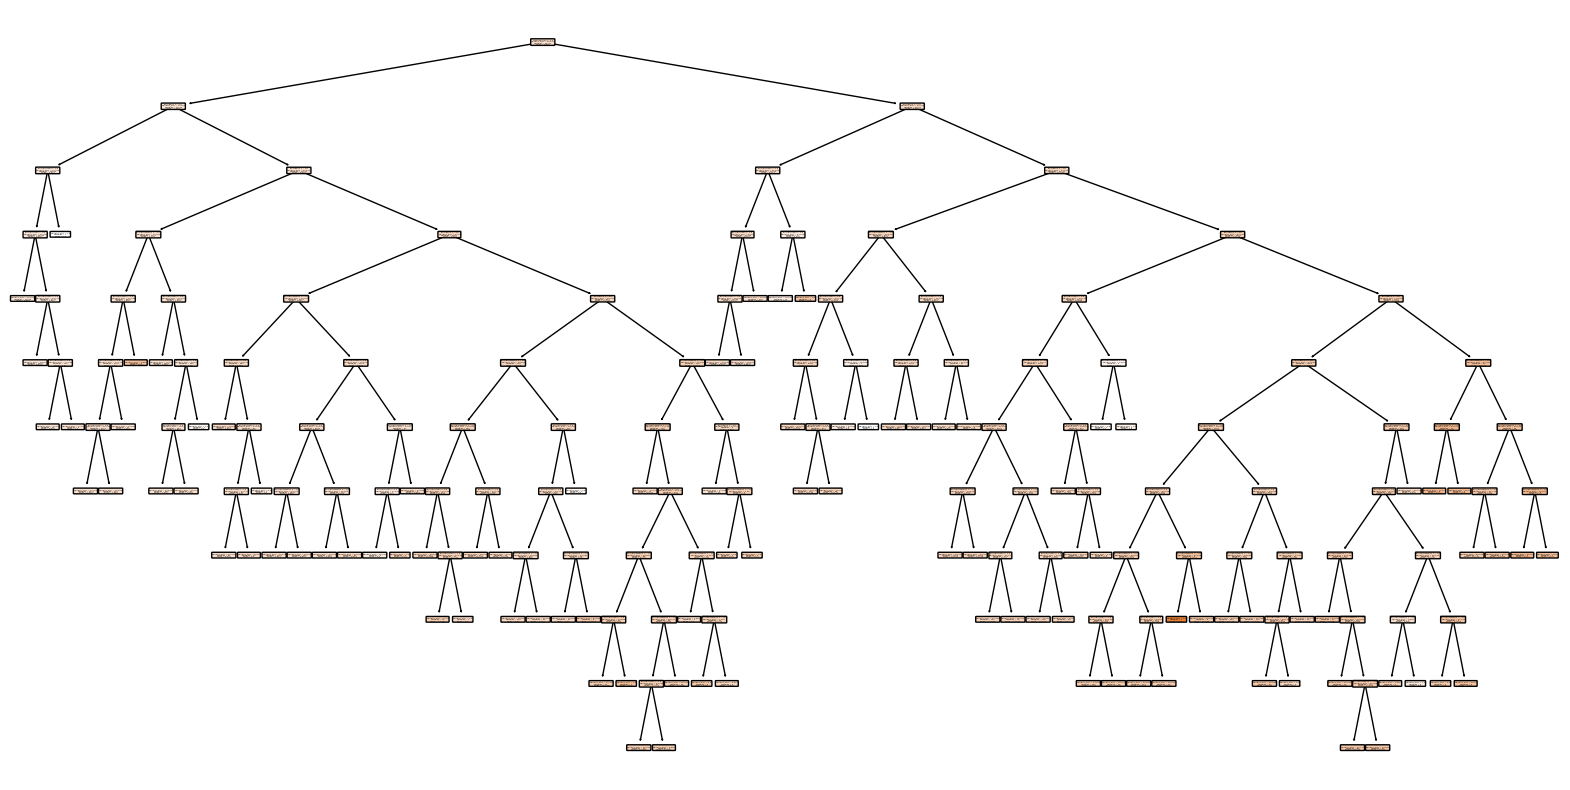

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, rounded=True)
plt.show()

Random forest

In [ ]:
features = [
    'RoundKills', 'RoundAssists', 'RoundHeadshots','MatchWinner'
]
print(set(features) - set(df2.columns))

set()


In [ ]:
available_features = [f for f in features if f in df2.columns]
X = df2[available_features]
y = df2['MatchKills']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


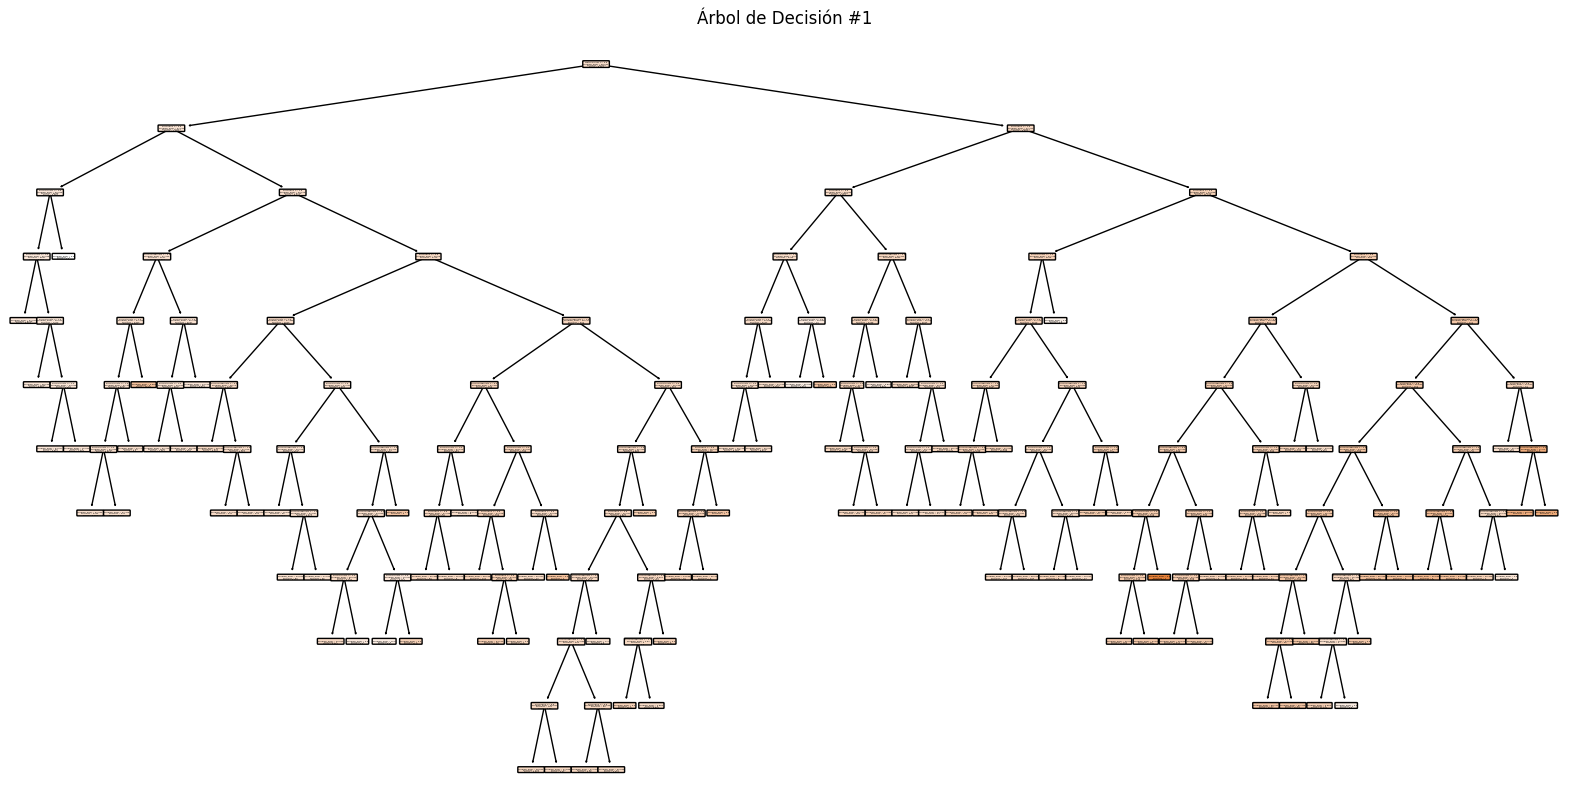

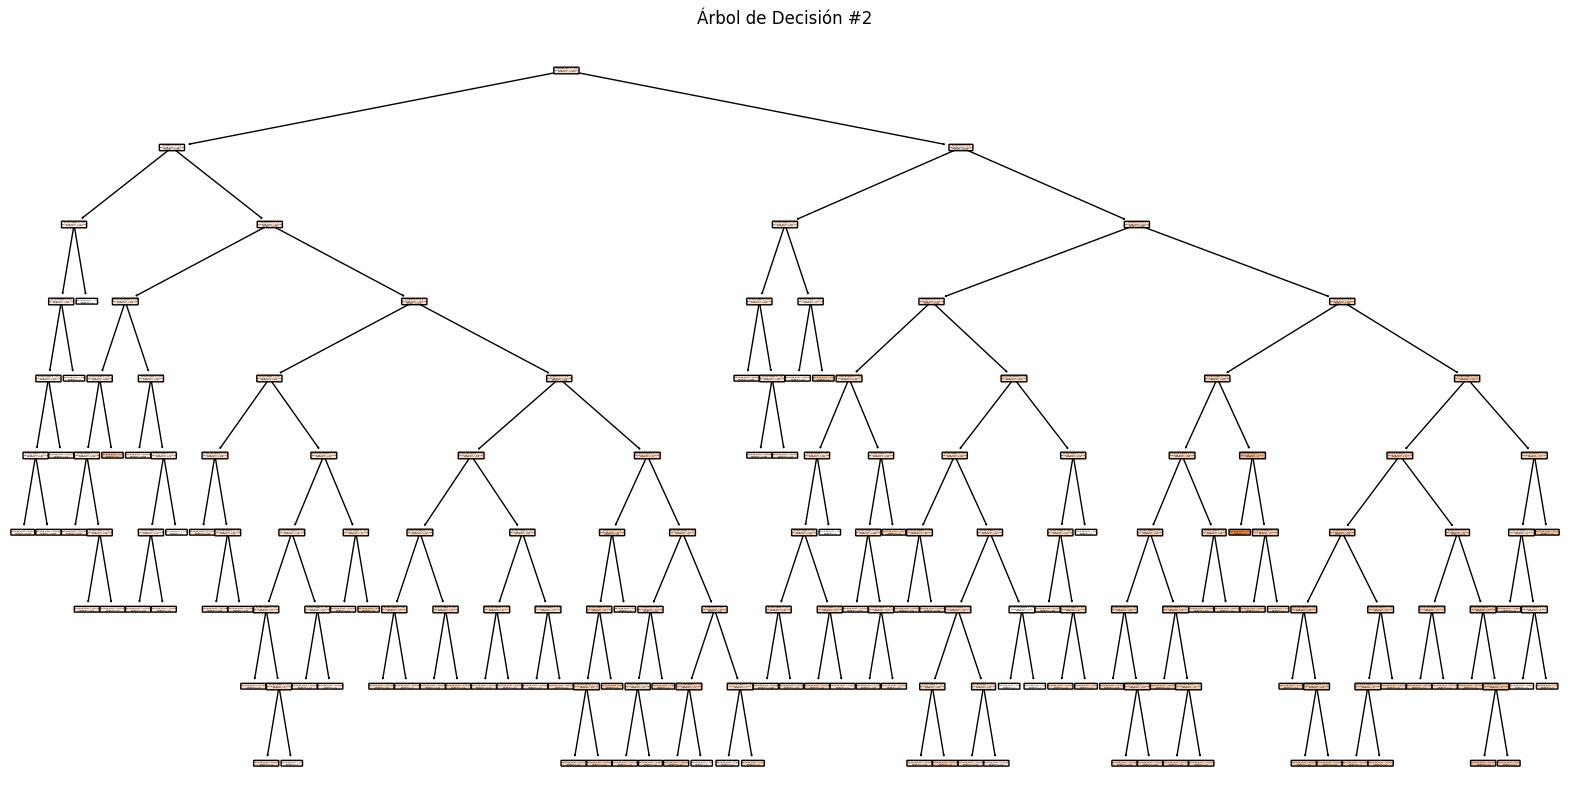

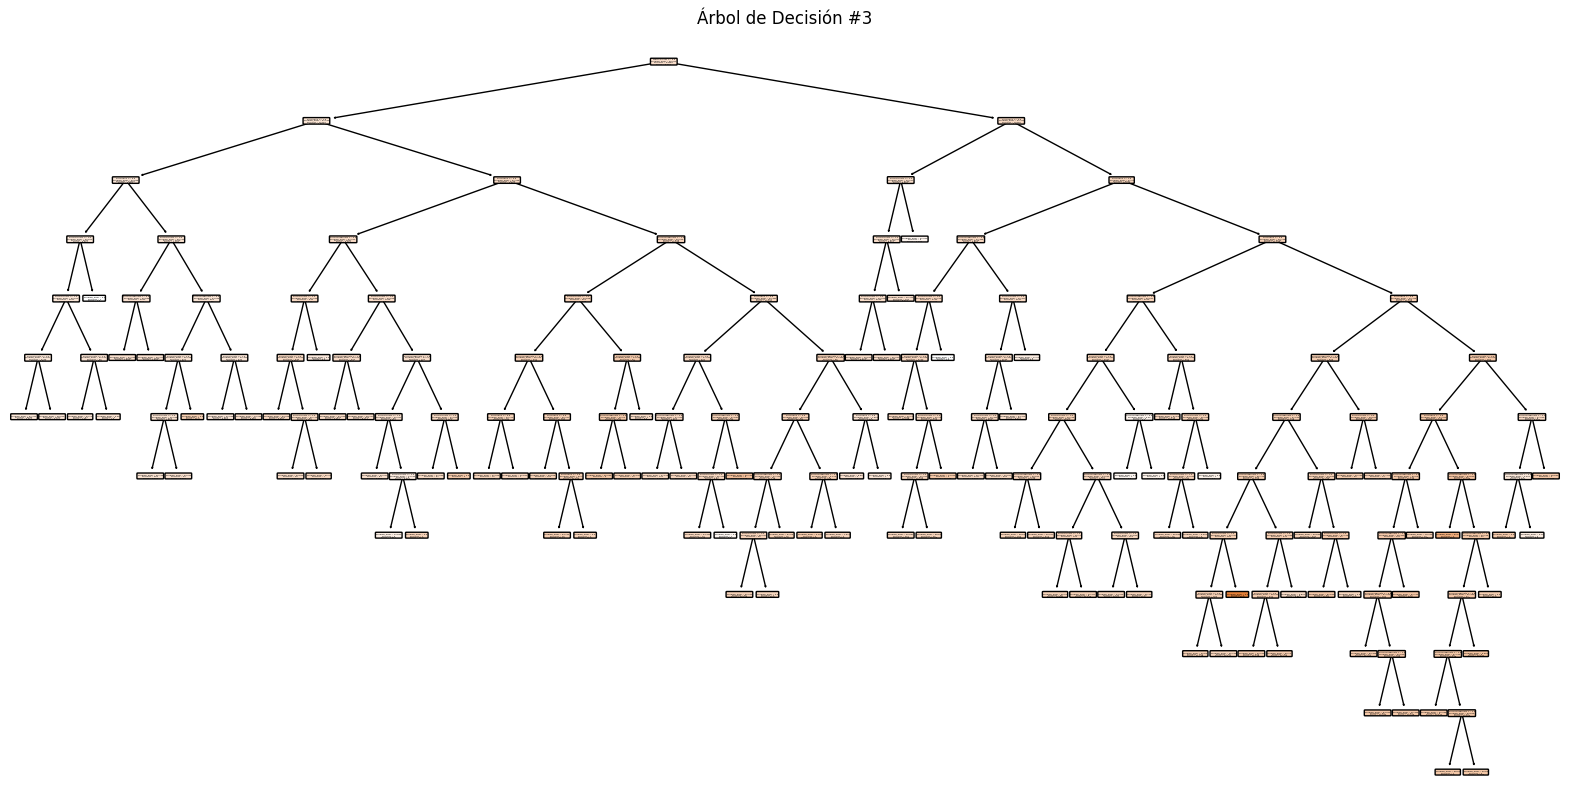

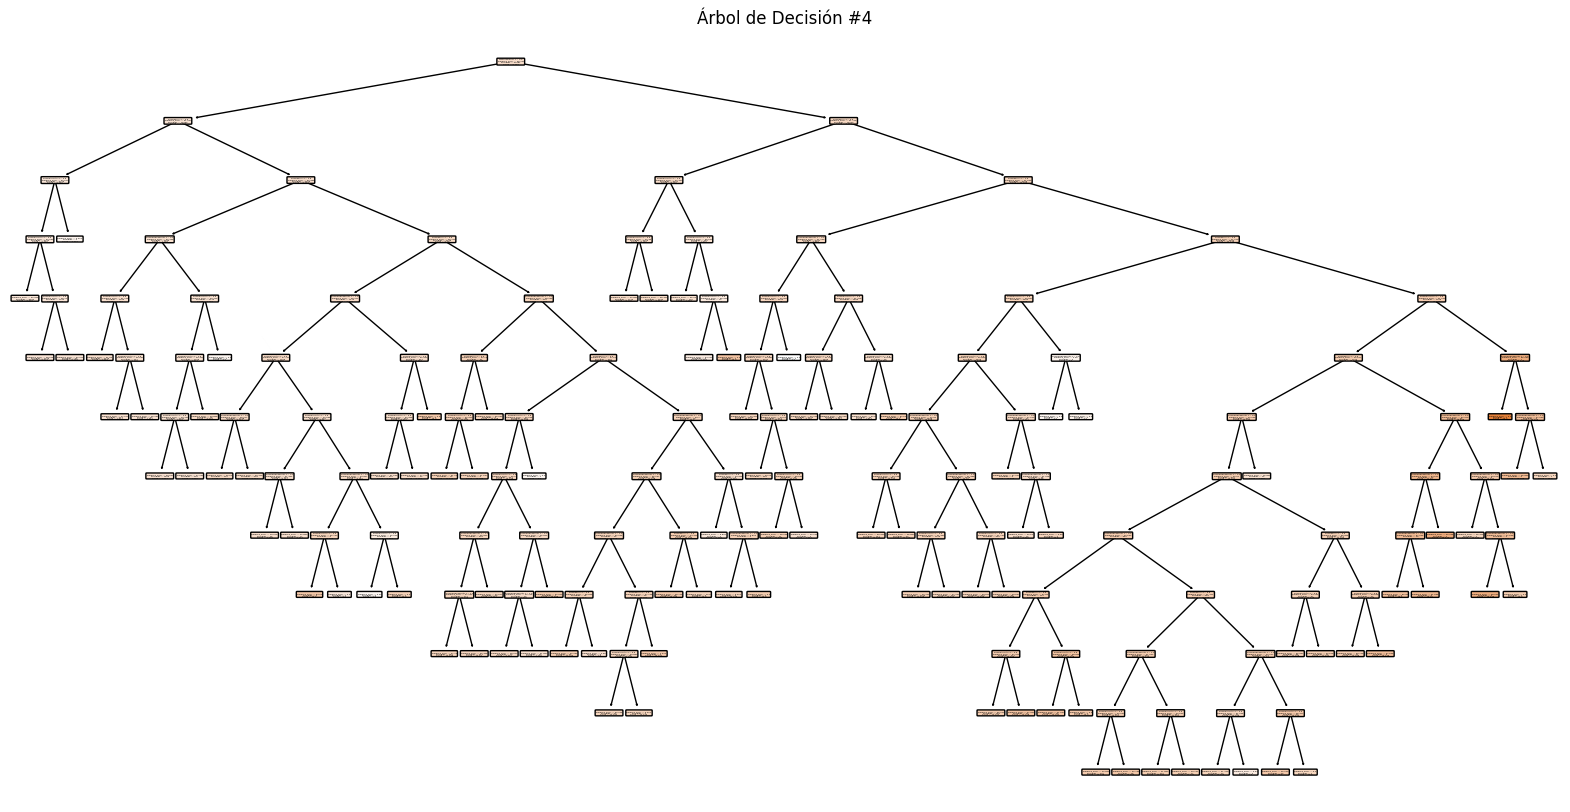

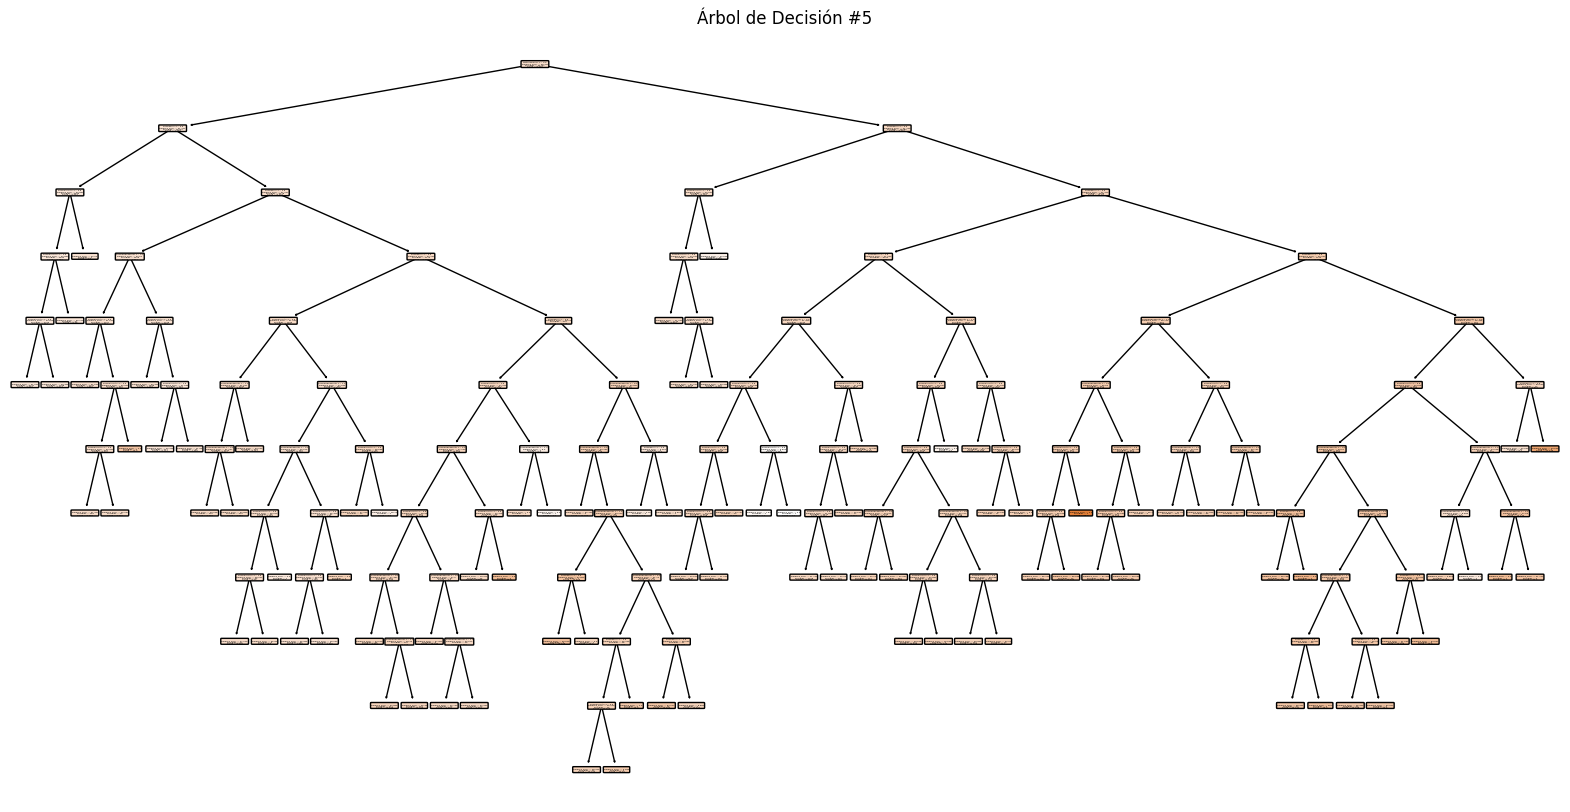

In [ ]:
for i in range(5):
    plt.figure(figsize=(20, 10))
    plot_tree(rf.estimators_[i], filled=True, feature_names=available_features, rounded=True)
    plt.title(f"Árbol de Decisión #{i + 1}")
    plt.show()
#primeros 5 arboles de random forest

Regresion lienal

In [ ]:
X = df2[['MatchHeadshots','RoundKills', 'RoundAssists', 'RoundHeadshots','MatchWinner']]
y = df2['MatchKills']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
predictions_df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred_lr})
print(predictions_df.head(10))


       Real  Predicción
64843    12    9.295766
55643     8    8.813233
42049     9   11.823693
67852     6    6.589887
27273    11   14.543423
8408     14    7.271920
75018    19   10.414365
13928     6    8.502126
78671    16   17.917110
57546     4    7.383527


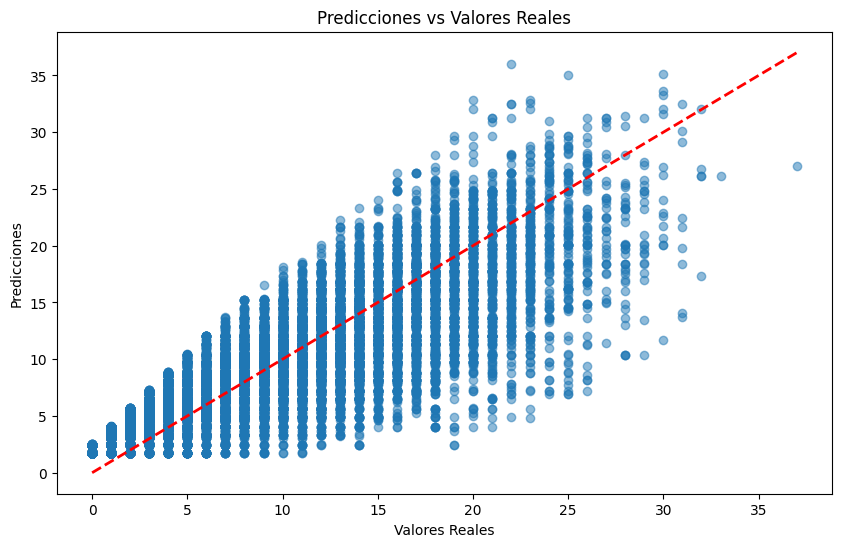

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()


# Fase 5 Evaluation


Visualizar MSE, RMSE y MAE, de arbolde de deciciones

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 36.62447919719522


In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 6.051816189971009


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 4.968305489653594


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


R^2 Score: 0.061341538314481636


Visualizar MSE, RMSE y MAE, de random forest

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 36.604144686575225


In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 6.050135922983485


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 4.967144380287853


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.06186269686406598


Visualizar MSE, RMSE y MAE, de Regresion lienal

In [ ]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse_lr}")

Mean Squared Error (MSE): 11.03504822206444


In [ ]:
rmse_lr = np.sqrt(mse_lr)
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")

Root Mean Squared Error (RMSE): 3.321904306578448


In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae_lr}")

Mean Absolute Error (MAE): 2.527249907860108


In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R^2 Score: {r2_lr}")

R^2 Score: 0.717179831200391


## Fase 5: Deployment

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [ ]:

import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("Enter the following feature values:")
round_kills = float(input("RoundKills: "))
round_assists = float(input("RoundAssists: "))
round_headshots = float(input("RoundHeadshots: "))
match_winner = int(input("MatchWinner (1 for win, 0 for loss): "))

# Create an input array
input_features = np.array([[round_kills, round_assists, round_headshots, match_winner]])

# Predict using the trained model
prediction = rf.predict(input_features)
print(f"Predicted Match Kills: {prediction[0]}")

Enter the following feature values:
RoundKills: 8
RoundAssists: 9
RoundHeadshots: 5
MatchWinner (1 for win, 0 for loss): 1


NameError: name 'np' is not defined